# IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [2]:
# menghubungkan dan mengakses Google Drive dari Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORT DATASET

In [3]:
import os

dir = 'drive/MyDrive/PCD MB/TUGAS/TUGAS AKHIR/Chili_Plant_Disease/'

# membuat sub directory untuk data train, val, and test
train_w = os.path.join(dir, 'train/whitefly')
train_y = os.path.join(dir, 'train/yellowish')
train_s = os.path.join(dir, 'train/leaf spot')
train_h = os.path.join(dir, 'train/healthy')
train_c = os.path.join(dir, 'train/leaf curl')

val_w = os.path.join(dir, 'val/whitefly')
val_y = os.path.join(dir, 'val/yellowish')
val_s = os.path.join(dir, 'val/leaf spot')
val_h = os.path.join(dir, 'val/healthy')
val_c = os.path.join(dir, 'val/leaf curl')

test_w = os.path.join(dir, 'test/whitefly')
test_y = os.path.join(dir, 'test/yellowish')
test_s = os.path.join(dir, 'test/leaf spot')
test_h = os.path.join(dir, 'test/healthy')
test_c = os.path.join(dir, 'test/leaf curl')

# membuat list untuk train_dir, val_dir, and test_dir
train_dir = [train_w, train_y, train_s, train_h, train_c]
val_dir = [val_w, val_y, val_s, val_h, val_c]
test_dir = [test_w, test_y, test_s, test_h, test_c]

dir2 = [train_dir, val_dir, test_dir]

# DATA UNDERSTANDING

In [4]:
train_dir = os.path.join(dir, 'train')
val_dir = os.path.join(dir, 'val')
test_dir = os.path.join(dir, 'test')

# List kelas (subfolder) dalam setiap direktori
classes = os.listdir(train_dir)

# Inisialisasi variabel untuk menyimpan nilai maksimum dan minimum
format_data = ''
max_size_data = (0, 0)
min_size_data = (float('inf'), float('inf'))
channels = 0

for class_name in classes:
    class_dir_train = os.path.join(train_dir, class_name)
    class_dir_val = os.path.join(val_dir, class_name)
    class_dir_test = os.path.join(test_dir, class_name)

    # Menghitung dan menampilkan informasi tentang setiap gambar
    for folder in [class_dir_train, class_dir_val, class_dir_test]:
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            format_data = img.format
            size_data = img.size
            channels = len(img.getbands())

            if size_data > max_size_data:
                max_size_data = size_data
            if size_data < min_size_data:
                min_size_data = size_data

# Menampilkan nilai maksimum dan minimum
print(f'Format Data: {format_data}')
print(f'Max Ukuran Data: {max_size_data}')
print(f'Min Ukuran Data: {min_size_data}')
print(f'Ukuran Channel: {channels}')

Format Data: JPEG
Max Ukuran Data: (432, 116)
Min Ukuran Data: (100, 100)
Ukuran Channel: 3


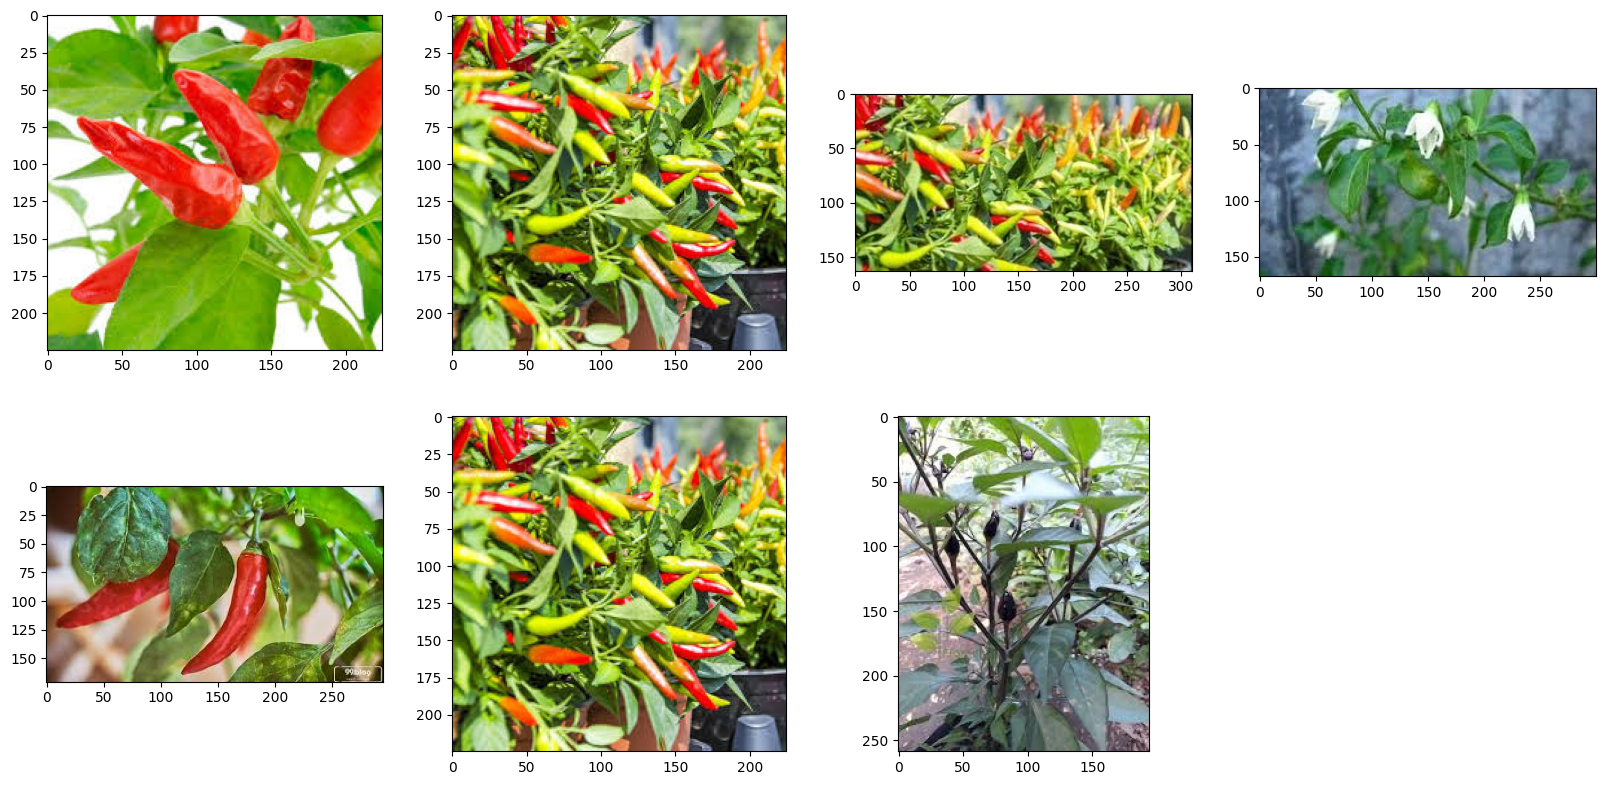

In [5]:
#isi data training
images=os.listdir(train_dir + '/' + 'healthy')
plt.figure(figsize=(20,20))
for i in range(7):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    img = mpimg.imread(os.path.join(train_dir + '/' + 'healthy', img))
    fig.imshow(img)

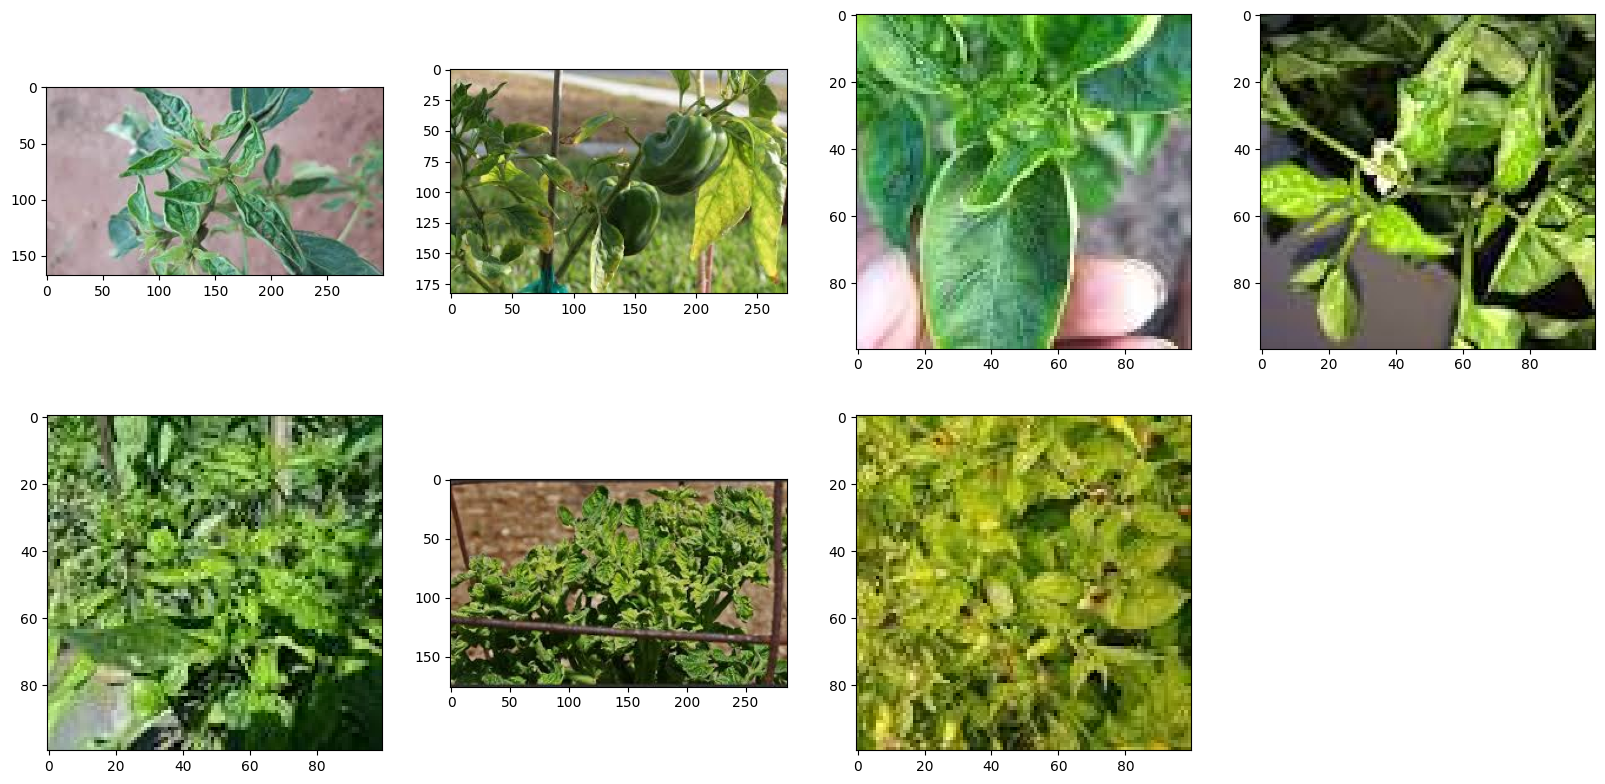

In [6]:
#isi data training
images=os.listdir(train_dir + '/' + 'leaf curl')
plt.figure(figsize=(20,20))
for i in range(7):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    img = mpimg.imread(os.path.join(train_dir + '/' + 'leaf curl', img))
    fig.imshow(img)

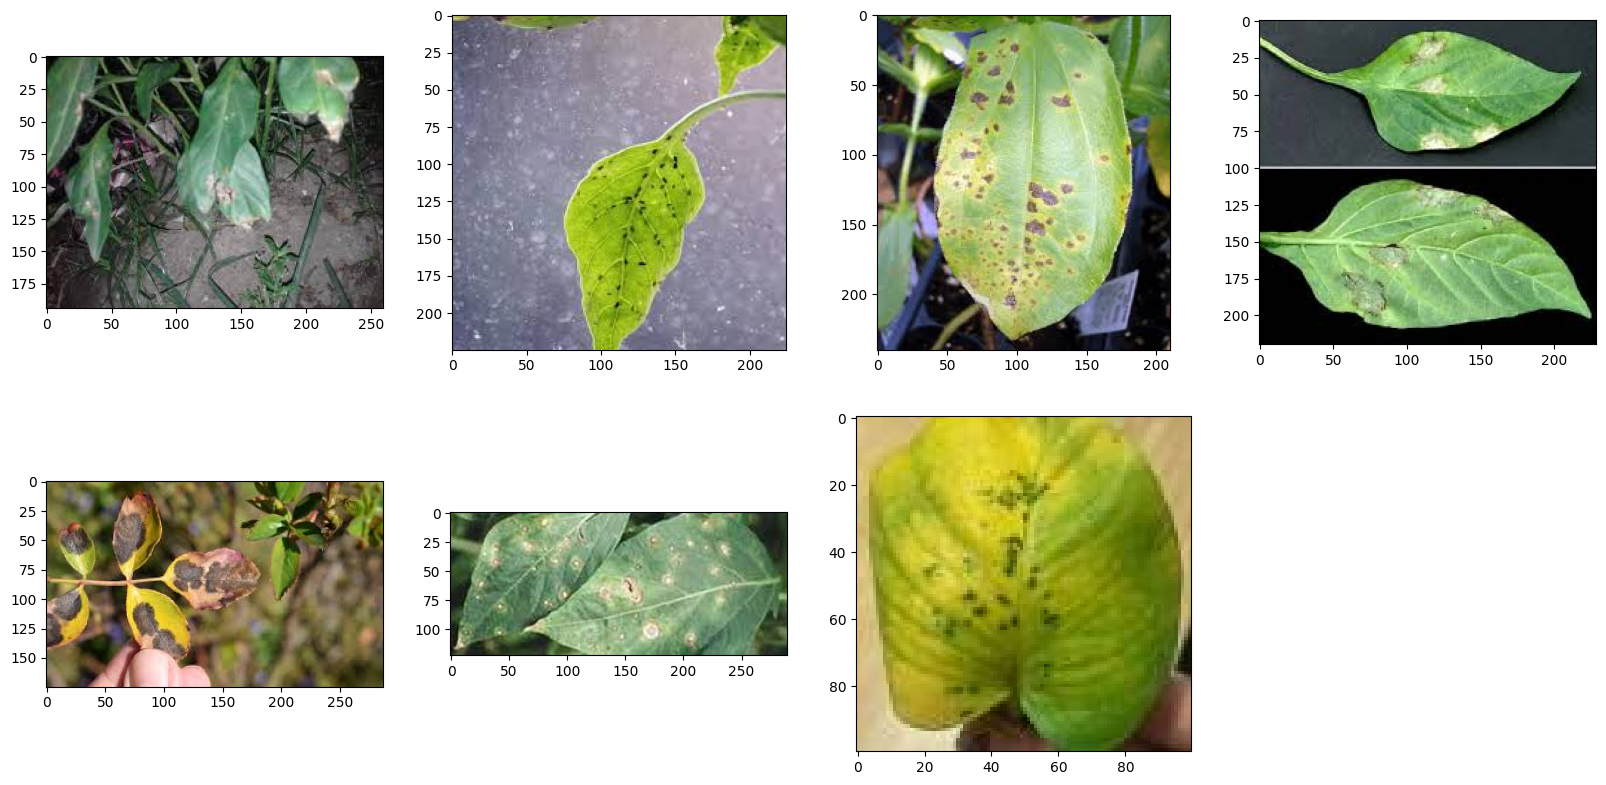

In [7]:
#isi data training
images=os.listdir(train_dir + '/' + 'leaf spot')
plt.figure(figsize=(20,20))
for i in range(7):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    img = mpimg.imread(os.path.join(train_dir + '/' + 'leaf spot', img))
    fig.imshow(img)

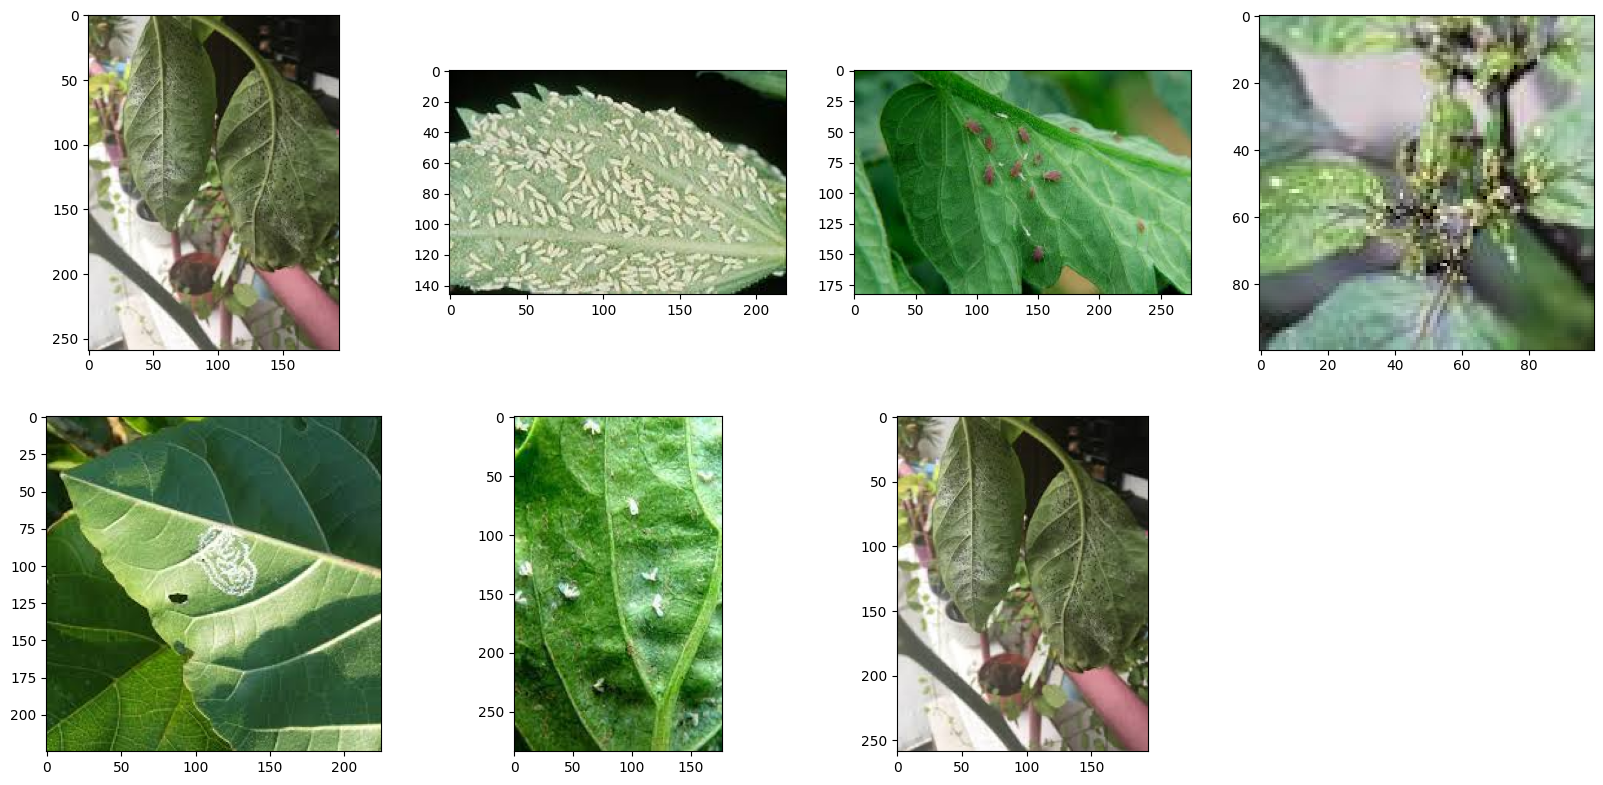

In [8]:
#isi data training
images=os.listdir(train_dir + '/' + 'whitefly')
plt.figure(figsize=(20,20))
for i in range(7):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    img = mpimg.imread(os.path.join(train_dir + '/' + 'whitefly', img))
    fig.imshow(img)

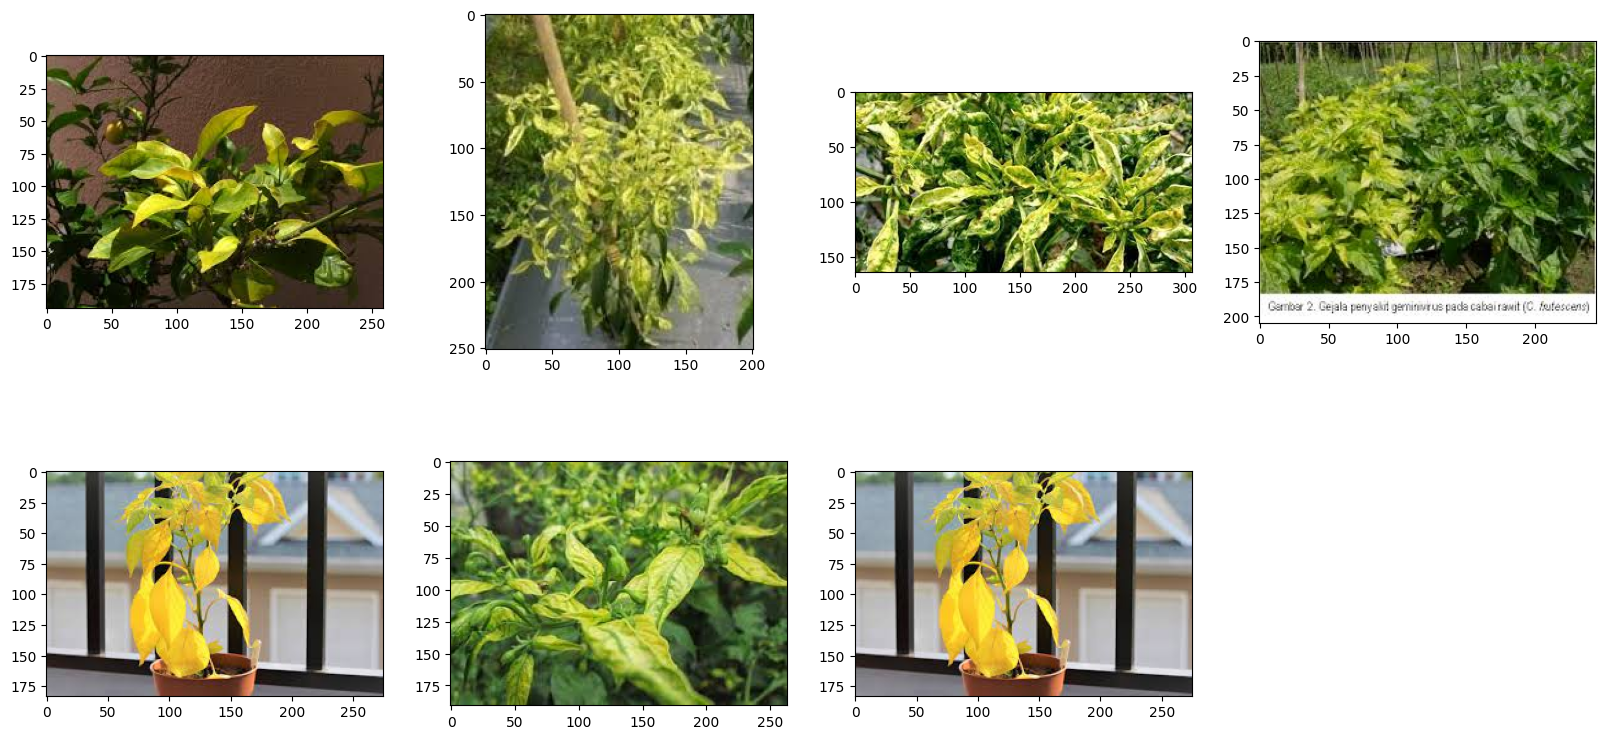

In [9]:
#isi data training
images=os.listdir(train_dir + '/' + 'yellowish')
plt.figure(figsize=(20,20))
for i in range(7):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    img = mpimg.imread(os.path.join(train_dir + '/' + 'yellowish', img))
    fig.imshow(img)

# DATA PREPARATION

In [10]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,
    zoom_range=0.2
)
val_test_gen = ImageDataGenerator(rescale=1./255)

In [11]:
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(100,100),
    class_mode='categorical',
    shuffle=True
)

val_data = val_test_gen.flow_from_directory(
    val_dir,
    target_size=(100,100),
    class_mode='categorical',
    shuffle=True
)

test_data = val_test_gen.flow_from_directory(
    test_dir,
    target_size=(100,100),
    class_mode='categorical',
    shuffle=False
)

Found 400 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


# MODELLING

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100,100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
  ])

model.summary()

optimizer = RMSprop(learning_rate= 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 64)        0

In [13]:
from tensorflow.keras.callbacks import Callback

class CustomAccuracyCallback(Callback):
    def __init__(self, target_accuracy=0.95):
        super(CustomAccuracyCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get('accuracy')  # Assuming you're using 'accuracy' as your metric
        if current_accuracy is not None and current_accuracy >= self.target_accuracy:
            print(f"\nReached {self.target_accuracy*100}% accuracy, stopping training.")
            self.model.stop_training = True
custom_callback = CustomAccuracyCallback(target_accuracy=0.95)

In [14]:
history = model.fit(
            train_data,
            validation_data=val_data,
            epochs=500,
            callbacks=[custom_callback])

Epoch 1/500
13/13 [==============================] - 9s 579ms/step - loss: 1.6925 - accuracy: 0.2100 - val_loss: 1.6885 - val_accuracy: 0.2000
Epoch 2/500
13/13 [==============================] - 6s 462ms/step - loss: 1.5931 - accuracy: 0.2900 - val_loss: 1.5695 - val_accuracy: 0.2400
Epoch 3/500
13/13 [==============================] - 8s 579ms/step - loss: 1.5484 - accuracy: 0.3075 - val_loss: 1.4782 - val_accuracy: 0.3200
Epoch 4/500
13/13 [==============================] - 6s 440ms/step - loss: 1.4094 - accuracy: 0.3775 - val_loss: 1.4333 - val_accuracy: 0.4800
Epoch 5/500
13/13 [==============================] - 7s 564ms/step - loss: 1.4597 - accuracy: 0.3925 - val_loss: 1.3649 - val_accuracy: 0.3800
Epoch 6/500
13/13 [==============================] - 6s 428ms/step - loss: 1.3197 - accuracy: 0.4400 - val_loss: 1.4493 - val_accuracy: 0.3600
Epoch 7/500
13/13 [==============================] - 7s 563ms/step - loss: 1.3484 - accuracy: 0.4450 - val_loss: 1.3394 - val_accuracy: 0.4000

# EVALUASI

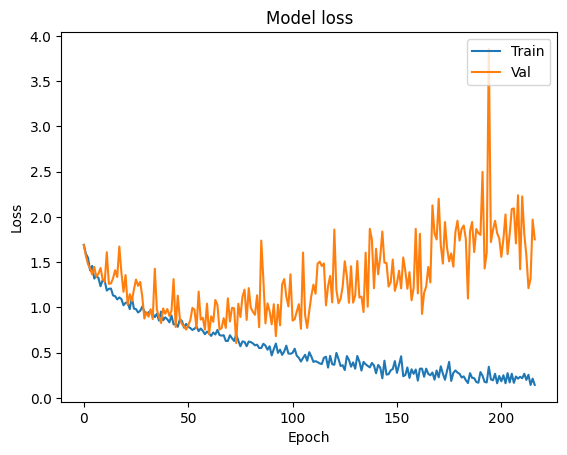

<Figure size 640x480 with 0 Axes>

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.savefig(dir+'chart_loss.png')

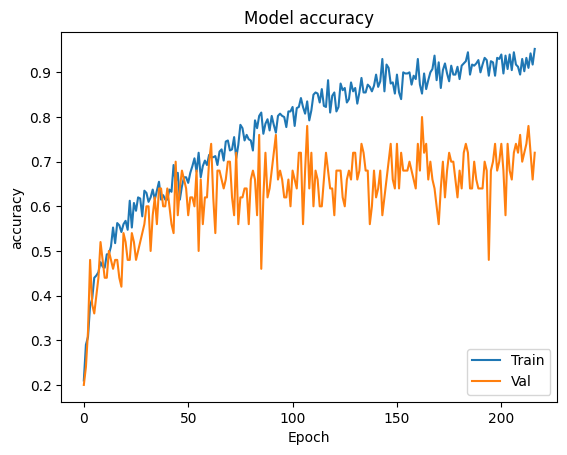

<Figure size 640x480 with 0 Axes>

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
plt.savefig(dir+'chart_accuracy.png')

In [17]:
# Prediksi pada data uji
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

2/2 [==============================] - 1s 80ms/step


In [18]:
# Mendapatkan label sebenarnya
y_true = test_data.classes

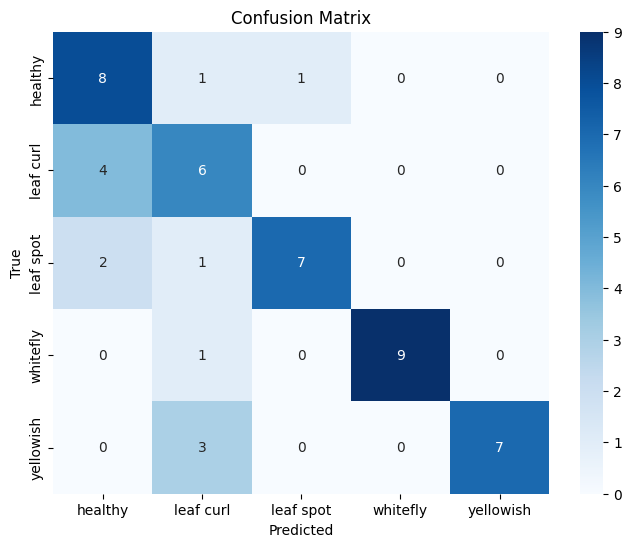

In [19]:
# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Menampilkan confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(),
            yticklabels=train_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# SAVE MODEL

In [20]:
tf.keras.models.save_model(model,'my_model2.hdf5')

<ipython-input-20-07e813155dae>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'my_model2.hdf5')


In [21]:
#save architecture as json and weight as h5
model_json = model.to_json()
with open(dir+"model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(dir+"model.h5")

In [22]:
tf.saved_model.save(model, dir+"tflite")

In [23]:
model.save(dir+"model/disease.h5")
model.save(dir+"model/disease")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
# Use the flow_from_directory() method to retrieve the classes
class_names = list(train_gen.flow_from_directory(train_dir).class_indices.keys())

# Print the classes
print(class_names)

Found 400 images belonging to 5 classes.
['healthy', 'leaf curl', 'leaf spot', 'whitefly', 'yellowish']


# TRY THE MODEL

Saving download (11).jpg to download (11).jpg
1/1 [==============================] - 0s 90ms/step


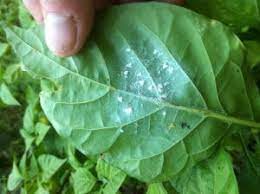

Predicted label: whitefly
[[2.1165521e-19 2.8909170e-14 2.6413300e-05 9.9997354e-01 0.0000000e+00]]


In [26]:
import cv2
import json
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import load_img, img_to_array
from google.colab import files
import numpy as np

# Memuat model
import_model = tf.keras.models.load_model(dir+'model/disease.h5')

uploaded = files.upload()

for fn in uploaded.keys():
    # Memprediksi gambar
    path = '/content/' + fn
    img = load_img(path, target_size=(100, 100))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = import_model.predict(images, batch_size=10)

    # Daftar nama label
    label_names = ['healthy', 'leaf curl', 'leaf spot', 'whitefly', 'yellowish']

    # Mendapatkan indeks label yang diprediksi
    predicted_label_index = np.argmax(classes)

    # Mendapatkan nama label yang diprediksi
    predicted_label_name = label_names[predicted_label_index]

    # Menampilkan gambar bersama dengan label hasil prediksi
    cv2_imshow(cv2.imread(path))
    print("Predicted label:", predicted_label_name)
    print(classes)